# Final remarks on the fit

# Outline

1. More on residuals (Normality checks)

2. Fit binned data

Assume you have data $\mathbf{Y}$ and you fit them with a model $\mathbf{M}$ ,depending on some input variable $\mathbf{x}$ and parameter $\mathbf{a}$.In the ideal case of a good model and a good fit we should be able to write down 



\begin{eqnarray}
\mathbf{Y}=\mathbf{M}(\mathbf{x}|\mathbf{a})+\mathcal{E}(0,\sigma^2)
\end{eqnarray}

or


\begin{eqnarray}
\mathbf{Y}-\mathbf{M}(\mathbf{x}|\mathbf{a})=\mathcal{E}(0,\sigma^2)
\end{eqnarray}

here $\mathcal{E}(0,\sigma^2)$ represent the residuals  and they should follow a normal distribution with mean 0 and variance $\sigma^2$.
We often speak of white noise in the case of a good fit.

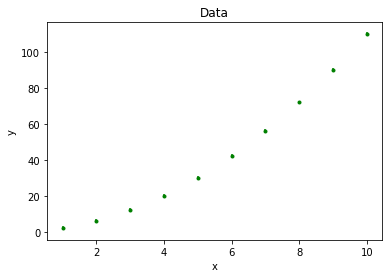

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x=np.array([1,2,3,4,5,6,7,8,9,10])
y=np.array([2,6,12,20,30,42,56,72,90,110])
ery=np.array([1,1,1,1,1,1,1,1,1,1])
erx=np.array([0,0,0,0,0,0,0,0,0,0])
plt.title('Data')
plt.xlabel('x')
plt.ylabel('y')
plt.errorbar(x, y, ery, erx, '.', color='green');
plt.show()


We assume that these data are describe by a model of the form

\begin{eqnarray}
y=ax+b
\end{eqnarray}

This is a working hypothesis... it could be wrong!

In [2]:
def ff(x,a,b):
    
    return a*x+b

In [3]:
from scipy.optimize import curve_fit
import numpy as np

p0= 1,100


best_vals, covar=curve_fit(ff,x, y,p0,sigma=ery) 

print("Best values for the fit are ",best_vals)
print(covar)

Best values for the fit are  [ 12. -22.]
[[ 0.8 -4.4]
 [-4.4 30.8]]


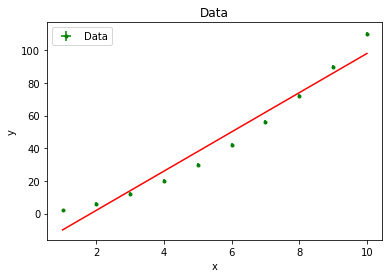

In [4]:
plt.title('Data')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, ff(x,best_vals[0],best_vals[1]), '-', color='red')
plt.errorbar(x, y, ery, erx, '.', color='green',label="Data");
plt.legend()
plt.show()

We calculate the chi2 at the minimum and we evaluate the goodness of fit

In [5]:
def chi2(xx,yy,eryy):
    a,b = best_vals
    ll=0
    for i in range(len(xx)):
         ll+= (yy[i]-ff(xx[i],a,b))**2/eryy[i]**2
    return ll

print(chi2(x,y,ery))

528.0


We calculate the goodness of fit

In [6]:
k=len(x)-2
print("Degrees of freedom=",k )
print("Goodness of fit", np.sqrt(2*chi2(x,y,ery))/np.sqrt(2*k-1))

Degrees of freedom= 8
Goodness of fit 8.390470785361213


We have been quick in doing the fit... look previous lectures to have details...
The goodness of fit indicates something wrong, but it is a linear fit so only 1 minimum!!

We can now work on the residuals!

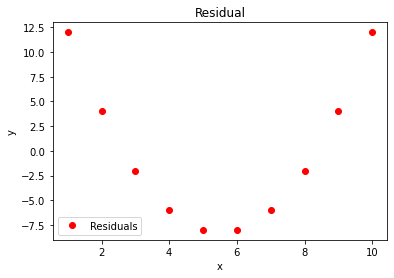

In [7]:
plt.title('Residual')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, (y-ff(x,best_vals[0],best_vals[1]))/ery, 'o', color='red',label="Residuals")
plt.legend()
plt.show()

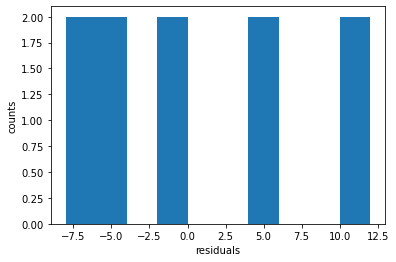

Mean= 0.0
Variance= 52.8


In [8]:
res=(y-ff(x,best_vals[0],best_vals[1]))/ery

plt.hist(res)
plt.xlabel("residuals")
plt.ylabel("counts")
plt.show()

print("Mean=" ,np.mean(res))
print("Variance=" ,np.var(res))

We clearly see that residuals show a clear structure.
We will run few tests on them.
First of all the autocorrelation test

\begin{eqnarray}
\gamma(p)=\frac{\sum_i (X_i-\bar{X}) (Y_i-\bar{Y})}{\sigma_x\sigma_y}\;,
\end{eqnarray}

where $Y_i=X_{i-p}$ is the delayed series.
$p=1,2,3,4,\dots$ is the lag or delay. We check if the residuals are independent (as they should) or not



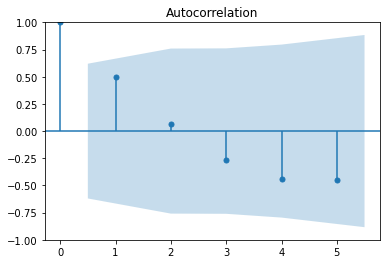

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(res,lags=5)
plt.show()

We see that there is some correlation (lag=1). The blue area is the uncertanty as given by the function.

https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html

We may suspect that something is not fully correct with our residuals

Another popular plot for checking the distribution of a data sample is the quantile-quantile plot (or QQ plot).
This plot generates its own sample of the idealized distribution that we are comparing with, in this case the Gaussian distribution. The idealized samples are divided into groups, called quantiles. Each data point in the sample is paired with a similar member from the idealized distribution at the same cumulative distribution.
The resulting points are plotted as a scatter plot with the idealized value on the x-axis and the data sample on the y-axis.
A perfect match for the distribution will be shown by a line of dots on a 45-degree angle from the bottom left of the plot to the top right. Deviations by the dots from the line shows a deviation from the expected distribution.


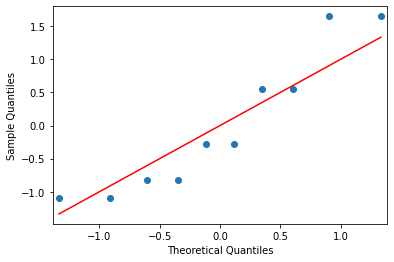

In [30]:
from statsmodels.graphics.gofplots import qqplot
##The qqplot assumes a normal distribution to compare it with. One can change the distribution using dist argument.
qqplot(res/np.sqrt(np.var(res)), line='s')

plt.show()


Many more test can be run to check normality but we stop here and I refer to the lecture of hypothesis testing....

### Extra PPQ point: 
#### 1) Generate a dataset (100 points) as above (following a second order polynomial) and fit this with a linear function. Plot the auto-correlation function for the residuals and a QQplot. 
#### 2) For the dataset above plot the QQ plot of residuals assuming residuals should be normally distributed. 

# Fitting Binned data: why a Gaussian may fail here....

In [83]:
import numpy as np
x=np.linspace(0,20,20)
y=np.linspace(0,0,20)

for i in range(len(x)):
    y[i]=14*np.exp(-x[i]/3)+np.random.normal(0,np.sqrt(14*np.exp(-x[i]/3)))
    if y[i]<0:
        y[i]=0
y=y.astype(int)


In [84]:
datax=np.array(x)
datay=np.array(y)

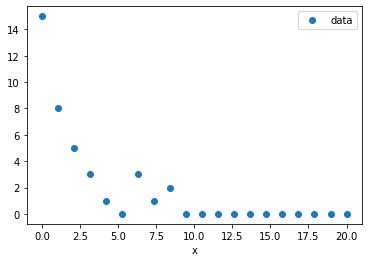

In [85]:
# We generate noisy data on integer values of x to mimick the idea of bins and low-statistics...

plt.plot(x,y,'o',label="data")
plt.legend()
plt.xlabel("x")
plt.show()

Let's start as usual with the chi2 function exactly as we did in Lecture 11 

In [86]:
def func(x,a,b):
    return a*np.exp(b*x)

In [87]:
import matplotlib.pyplot as plt
from numpy import exp, loadtxt, pi, sqrt
from lmfit import Model
gmodel = Model(func)
result = gmodel.fit(y, x=x, a=12, b=-0.5)
print(result.fit_report())

[[Model]]
    Model(func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10
    # data points      = 20
    # variables        = 2
    chi-square         = 11.4695911
    reduced chi-square = 0.63719950
    Akaike info crit   = -7.12065993
    Bayesian info crit = -5.12919538
[[Variables]]
    a:  14.7138177 +/- 0.75156328 (5.11%) (init = 12)
    b: -0.51667359 +/- 0.04793363 (9.28%) (init = -0.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.502


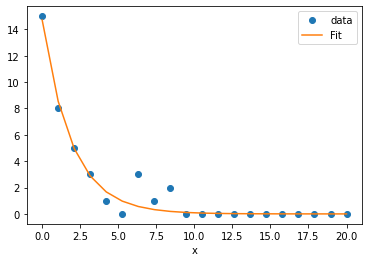

In [88]:
plt.plot(x,y,'o',label="data")
plt.plot(x,result.best_fit,'-',label="Fit")
plt.legend()
plt.xlabel("x")
plt.show()

At this stage we just want to plot the $\chi^2$ surface to see how it looks like. We can do a better analysis of the fit, but I leave it to you.

In [89]:
def chi2(aaa, bbb): 
    ll=0
    for i in range(len(datax)):
        ll+=(datay[i]-func(datax[i],aaa,bbb))**2
       # print(datay[i])
    return ll

In [90]:
Ax=np.linspace(10,16,500)
Bx=np.linspace(-0.7,-0.15,500)

Axgrid, Bxgrid = np.meshgrid(Ax, Bx)
Zgrid = chi2(Axgrid, Bxgrid)

In [91]:
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import pylab as py

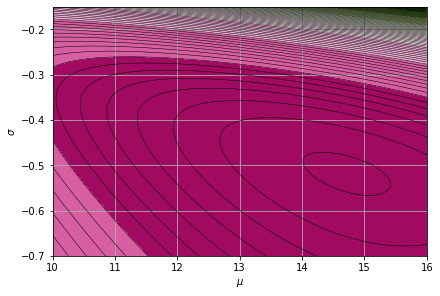

In [92]:
fig, ax = plt.subplots(constrained_layout=True)
levels = MaxNLocator(nbins=55).tick_values(Zgrid.min(), Zgrid.max())
cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
pc=ax.contourf(Axgrid,Bxgrid, Zgrid,cmap=cmap,norm=norm)
CS = plt.contour(Axgrid,Bxgrid, Zgrid,100,linewidths=0.5,colors='k')

plt.ylabel('$\sigma$')
plt.xlabel('$\mu$')
ax.grid()
plt.show()

We have used here the standard $\chi^2$ to perform the fit, but remeber this is based on the hypothesis that the underlying distribution is a Gaussian.
What happens if we change the underlying distribution? What if instead of a Gaussian we use a Poisson, since here we are dealing with binned data and low-statistics? 

Let's now start again from the likelihood assuming a Poisson

\begin{eqnarray*}
\mathcal{L}=\Pi_i P_{Poisson}(y_i,f(x_i|a))=\Pi_i \frac{f(x_i|a)^{y_i}}{y_i!}exp(-f(x_i|a))
\end{eqnarray*}

or after some maths

\begin{eqnarray*}
-2\ln L=2\sum_i (f(x_i|a)-y_i \ln f(x_i|a) +\ln y_i!)
\end{eqnarray*}

The term $+\ln y_i!$ does not depend on parameters so during minimisation we can forget it!

In [93]:
def like(param):
    aaa,bbb = param
    ll=0
    for i in range(len(datax)):
        ll+=2*(func(datax[i],aaa,bbb)-datay[i]*np.log(func(datax[i],aaa,bbb)))       
    return ll

In [94]:
Ax=np.linspace(10,16,500)
Bx=np.linspace(-0.7,-0.15,500)

Axgrid, Bxgrid = np.meshgrid(Ax, Bx)
paramz=[Axgrid, Bxgrid]
Zgrid = like(paramz)

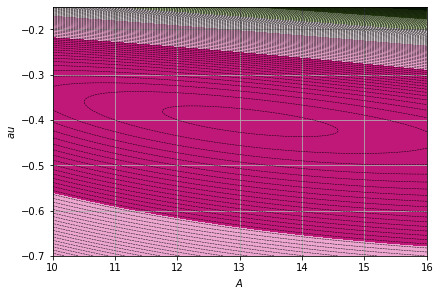

In [95]:
fig, ax = plt.subplots(constrained_layout=True)
levels = MaxNLocator(nbins=55).tick_values(Zgrid.min(), Zgrid.max())
cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)
pc=ax.contourf(Axgrid,Bxgrid, Zgrid,cmap=cmap,norm=norm)
CS = plt.contour(Axgrid,Bxgrid, Zgrid,100,linewidths=0.5,colors='k')

plt.ylabel('$\tau$')
plt.xlabel('$A$')
ax.grid()
plt.show()

In [73]:
import scipy.optimize as opt

p0=[10,-0.3]
opt.fmin(like, p0, args=())

Optimization terminated successfully.
         Current function value: -83.588419
         Iterations: 39
         Function evaluations: 74


array([15.7928816 , -0.43477445])

If you compare the results we get $a=14.7$ and $b=-0.51$ using the Gaussian and $a=15.79$ and $b=-0.43$ using the Poisson. 

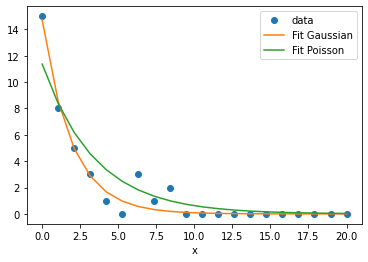

In [96]:
plt.plot(x,y,'o',label="data")
plt.plot(x,result.best_fit,'-',label="Fit Gaussian")
plt.plot(x,func(x,11.37,-0.29),'-',label="Fit Poisson")
plt.legend()
plt.xlabel("x")
plt.show()

We see that the fit both reproduce "reasonably" the data but depending on which underlying distribution you assume you may get very different  results!